# Classes 

## Prof. Henry Cagnini

### Agenda:

* Introdução 
* Construtor
* Getters e Setters
* Deleters
* Leitura recomendada

## Introdução

* Baseado na sintaxe de [C++/Modula-3](https://docs.python.org/3/tutorial/classes.html)
* Não existem palavras reservadas como public, private, static, final
* Permite herança múltipla
* Classes podem ser modificadas em tempo de execução

## Declarando a classe mais simples

* O nome da classe deve ser declarado utilizando a notação ```CamelCase```
* Todas as classes descendem da classe ```object``` em algum nível


Declaração:

In [1]:
class MyClass(object):
    pass  # NO-OP

Utilização:

In [2]:
inst = MyClass()

## Construtor

* Independente do nome da classe, o nome do construtor **sempre** será ```__init__```
* O primeiro parâmetro do construtor é **sempre** a instância que está chamando o construtor
  * Por convenção, o nome deste parâmetro é ```self```
  * Pode assumir qualquer outro nome, mas não é recomendado por prejudicar a legibilidade
  * Este mesmo comportamento ocorre com outros métodos

In [3]:
class MyClass(object):
    def __init__(self, value):
        print('o tipo do parâmetro value é %r' % type(value))
        print('o tipo do parâmetro self é %r' % type(self))

In [4]:
inst = MyClass('abc')

o tipo do parâmetro value é <class 'str'>
o tipo do parâmetro self é <class '__main__.MyClass'>


In [5]:
inst = MyClass(123)

o tipo do parâmetro value é <class 'int'>
o tipo do parâmetro self é <class '__main__.MyClass'>


## Construtor

A comunidade Python recomenda, para fins de clareza, que todos os atributos de uma classe sejam declarados e instanciados em seu construtor:

In [6]:
class Carro(object):
    # a própria instância deve ser o primeiro parâmetro 
    def __init__(self, fabricante, modelo):
        # atribuindo o valor do parâmetro fabricante ao atributo fabricante desta instância
        self.fabricante = fabricante  
        self.modelo = modelo
        
carro1 = Carro('toyota', 'corolla')
print(carro1.fabricante, carro1.modelo)

toyota corolla


## Getters e setters

* Métodos getter são decorados com ```@property```
  * são acessados como se fossem atributos
* Métodos setter são decorados com @<nome_da_variavel>.setter
  * são atribuídos como se fossem atributos

Declaração:

In [7]:
class MyClass(object):
    def __init__(self, var):  # construtor da classe
        self._var = var  # atribui o valor do parâmetro var ao atributo _var
        
    @property  # decorador de getter
    def var(self):
        return self._var  # retorna o valor do atributo _var
    
    @var.setter # decorador de setter
    def var(self, value):
        if value > 0:
            self._var = value  # atribui o valor do parâmetro value ao atributo _var
        else:
            print('o valor atribuído é inválido')

## Getters e setters

Utilização:

In [8]:
instance = MyClass(1)
print(instance.var)

1


In [9]:
instance.var = 2
print(instance.var)

2


In [10]:
instance.var = -1
print(instance.var)

o valor atribuído é inválido
2


## Destrutores

Existem destrutores para **variáveis** também:

Declaração:

In [11]:
class MyClass(object):
    def __init__(self, var):
        self._var = var
        
    @property
    def var(self):
        return self._var
    
    @var.setter 
    def var(self, value):
        self._var = value 
    
    @var.deleter
    def var(self):
        print('deletando var!')
        del self._var

## Destrutores

Utilização:

In [12]:
instance = MyClass(1)
del instance.var

deletando var!


## Leitura recomendada

* Documentação oficial sobre classes: https://docs.python.org/3/tutorial/classes.html

# Classes 

## Prof. Henry Cagnini

### Agenda:

* Métodos e atributos privados
* Métodos estatáticos
* Métodos de classe
* Herança múltipla
* Sobrescrita de métodos
* Sobrecarga de operadores
* Leitura recomendada

## E se eu quiser...

* ...declarar um **método final**?\[1\]
  * Você não pode!
* ...declarar métodos e atributos privados/protegidos, para nenhuma classe descendente acessar?
  * você não pode!

\[1\] Um método é dito final quando não pode ser sobrescrito por nenhuma classe descendente

## Métodos e atributos privados
### (mais ou menos)

Para declará-los, você deve se basear na **documentação:**

In [13]:
class MyClass(object):
    def __method__(self, var1):
        self._attribute = var1

* O underline ```_``` (um para atributos, dois para métodos) notifica outros programadores que aquele método/atributo não deve ser acessado por eles, e que se o fizerem, resultará em um comportamento inesperado
* Isso é um padrão da comunidade Python (não é enforçado pelos interpretadores)
* O principal motivo para isto é a falta de fé em métodos 100% seguros
* [Acessando métodos/atributos privados em Java](http://migre.me/qFx2Y)


## Métodos e atributos privados

Outro exemplo de métodos e atributos privados:

In [14]:
class Aviao(object):
    def __init__(self, motor):
        self._motor = motor  # atributo que não deve ser acessado fora do escopo de Aviao
    
    def voa(self):
        self.__queima_combustivel__() 
    
    def __queima_combustivel__(self):  # método que não deve ser acessado fora do escopo de Aviao
        print('queimando combustivel com o motor %s' % self._motor)
    
    @property  # metodologia correta para acessar um atributo privado
    def motor(self):  
        return self._motor
    
atr_72 = Aviao('turboprop')
atr_72.voa()
# note que uma propriedade é tratada como um atributo na chamada, mas implementada como uma função na classe
print(atr_72.motor)

# print(atr_72._motor) # na prática é acessível; porém você não deve fazer isso!
# atr_72.__queima_combustivel__()  # na prática é acessível; porém você não deve fazer isso! 

queimando combustivel com o motor turboprop
turboprop


## Métodos estáticos

Métodos estáticos não interagem com nenhum atributo da instância

Declaração:

In [15]:
class MyClass(object):
    @staticmethod  # decorador para métodos estáticos
    def my_static_method():  # não exigem a passagem do parâmetro self
        return 'hello world!'

## Métodos estáticos

Instanciação:

In [16]:
instance = MyClass()
print('método da classe:\t', MyClass.my_static_method())
print('método da instância:\t', instance.my_static_method())  

método da classe:	 hello world!
método da instância:	 hello world!


## Métodos de classe

Métodos de classe são voltados a instanciar objetos a partir de outros métodos que não os construtores

In [18]:
class Date(object):
    day = 1
    month = 1
    year = 1970
    def __init__(self, day, month, year):
        self.day, self.month, self.year = (day, month, year)
    @classmethod
    def from_string(cls, string):  # o primeiro parâmetro de um método de classe é a própria classe
        some_list = string.split('-')
        date = cls(some_list[0], some_list[1], some_list[2])
        return date


## Métodos de classe

Atributos declarados na classe são comuns a todas as instâncias. Considere esse o valor default para o atributo ```year```:

In [19]:
print(Date.year)  # valor referente a classe

1970


## Métodos de classe

Usando um método de classe:

In [20]:
date1 = Date(2, 3, 1973)
date2 = Date.from_string('2-3-1973')
print('usando construtor:\t\t', date1.year)
print('usando um método de classe:\t', date2.year)

usando construtor:		 1973
usando um método de classe:	 1973


## Métodos de classe

* Em Python, não existe sobrecarga de métodos a nível da mesma classe (apenas classes descendentes podem sobrescrever métodos das classes pai)
  * também pode ser chamado de polimorfismo
* Portanto, métodos de classe são importantes para tratar diversos tipos de dados
* Mais sobre métodos estáticos e métodos de classe neste [link](https://docs.python.org/3/howto/descriptor.html#static-methods-and-class-methods)

## Métodos de classe

Para que atributos de uma classe possuam valores default, declare-os no corpo da classe:

In [21]:
class Bairro(object):
    nome = 'sem nome'
    def __init__(self, nome):
        self.nome = nome  # sobrescreve o atributo nome desta instância, mas não desta classe
        
bairro1 = Bairro('partenon')
print(bairro1.nome)
print(Bairro.nome)
# sobrescreve o valor do atributo "nome" da classe; válido apenas durante a execução do código
Bairro.nome = 'ainda sem nome'  
print(Bairro.nome)

partenon
sem nome
ainda sem nome


## Herança múltipla

Python não restringe herança múltipla como outras linguagens de programação podem fazer:

In [22]:
class Fulano(object):
    def fala(self):
        print("sou um fulano")

class Ciclano(Fulano):
    def fala(self):
        print("sou um ciclano")

class Sicrano(Fulano):
    def fala(self):
        print("sou um sicrano")
        
class Beltrano(Ciclano, Sicrano):  # herança múltipla
    pass


## Sobrescrita de métodos

Para sobrescrever métodos de uma superclasse, basta reescrevê-la na subclasse:

In [24]:
class Animal(object):
    def mover(*args, **kwargs):
        print('implemente!')

class Cobra(Animal):
    def mover(*args, **kwargs):
        print('rasteja')
        
print('algum animal:')
algum_animal = Animal()
algum_animal.mover()
        
print('naja:')
naja = Cobra()
naja.mover()

algum animal:
implemente!
naja:
rasteja


## Sobrecarga de operadores

Em Python, operadores podem ser [sobrescritos](http://blog.teamtreehouse.com/operator-overloading-python):
  * \+ \- / \* 
  * < > >= <= == !=
  * A sobrecarga é similar a que ocorre em C++

Declaração:

In [25]:
class Vector(object):
    coords = None
    def __init__(self, coords):
        self.coords = coords
    def __add__(self, other):  # operador + 
        return [x[0] + x[1] for x in zip(self.coords, other.coords)]
    def __str__(self): # operador print
        return '[' + ', '.join([str(x) for x in self.coords]) + ']'

## Sobrecarga de operadores

Instanciação:

In [26]:
a, b = Vector([2, 3, 5]), Vector([7, 11, 13])
c = a + b
print(a)
print(b)
print(c)

[2, 3, 5]
[7, 11, 13]
[9, 14, 18]


## Leitura recomendada

* Documentação oficial sobre classes: https://docs.python.org/3/tutorial/classes.html
* Sobrecarga de operadores em Python: http://blog.teamtreehouse.com/operator-overloading-python

# CPython

## Prof. Henry Cagnini

### Agenda:

* Introdução 
* Conceitos gerais
* Leitura recomendada

## Introdução

* Quando utilizamos bibliotecas em Python (e.g. scikit-learn, numpy, pandas), na verdade estamos utilizando um código-fonte compilado em C/C++ 
    * Permite que a execução do código-fonte seja rápida, pois o código é compilado
    * Não sacrifica a versatilidade de Python, que é interpretada

## Introdução

* Quando trabalhamos com machine learning e data science, é comum querermos implementar código-fonte próprio
* Ou então implementar um algoritmo disponível em um artigo
* Como fazemos isso em Python sem comprometer o desempenho?

## Conceitos gerais

* Código fonte em Python:
  * Não é utilizado, apenas para efeitos de comparação

In [2]:
def modelo_randomico_py(data, n_classes=2):
    """
    Modelo randômico chuta a classe de um exemplo.
    """
    
    n_instances, n_classes = data.shape
    preds = np.random.randint(0, n_classes, size=n_instances)
    return preds

## Conceitos gerais

* Código fonte em C:
  * Arquivo ```modelo_randomico.c```

* Script de configuração:
  * Arquivo ```setup.py```

* Linha de comando:
    * Para construir a biblioteca:
    ```
    python setup.py build
    ```
    * Para distribuir na máquina atual:
    ```
    python setup.py install
    ```

## Conceitos gerais

* Utilizando a biblioteca:

In [8]:
import numpy as np
import modelo  # nome do módulo criado

a = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
preds = [-1, -1, -1]
shape = (3, 3)
n_classes = 2

preds = modelo.modelo_randomico(shape,a, preds, n_classes)
print(preds)

[1, 0, 1]


## Conclusão

* Para escrever módulos em C, é necessário paciência e uma consulta extensa a documentação
  * É preciso saber programar em C/C++
* Procure exemplos no github para se basear
* Os benefícios compensam!
  * O desempenho do código-fonte é melhorado

## Leitura recomendada

* Documentação oficial: https://docs.python.org/3.6/extending/building.html

# Matplotlib

## Prof. Henry Cagnini

### Agenda:

* Introdução.
* Projeções 2D
  * Dispersão
  * Linhas 
  * Barras
  * Histograma
  * Boxplot
  * Mapa de calor
  * Imagens

## Introdução

Matplotlib é uma biblioteca para visualização de dados
* Permite fazer diversos tipos de projeção
* Solução computacionalmente barata
* Para projeções mais complexas ou visando fazer apresentações, considerar uma biblioteca mais robustar (e.g. [plotly](https://plot.ly/))

## Projeções 2D
### Dispersão

* [matplotlib.pyplot.scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
* Permite projetar os dados em um plano cartesiano

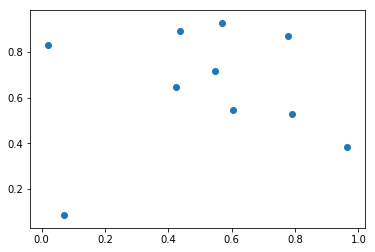

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
a = np.random.random((10, 2))

plt.scatter(a[:, 0], a[:, 1])
plt.show()

## Projeções 2D
### Dispersão

Assim como outras funções da biblioteca matplotlib, existem vários parâmetros que podem ser fornecidos. Os mais comuns são:
* ```s```: Tamanho dos itens
* ```c```: cor dos itens 
* ```marker```: estilo do marcador

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
a = np.random.random((10, 2))

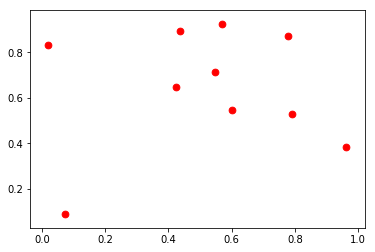

In [3]:
%matplotlib inline
plt.scatter(a[:, 0], a[:, 1], c='red', s=45)
plt.show()

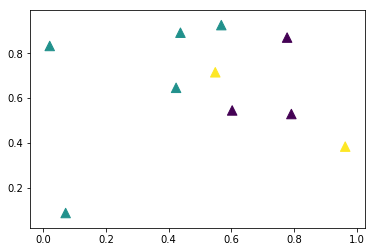

In [4]:
%matplotlib inline
b = np.random.randint(0, 3, size=10)
plt.scatter(a[:, 0], a[:, 1], c=b, s=90, marker='^')
plt.show()

## Projeções 2D
### Linhas

* [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
* Similar a projeção de dispersão, mas conecta os pontos através de uma linha

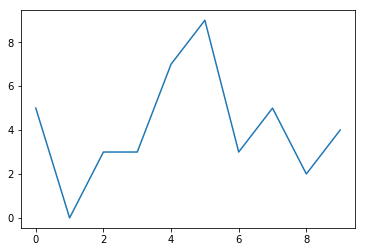

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.arange(10)
y = np.random.randint(low=0, high=10, size=10)

plt.plot(x, y)
plt.show()

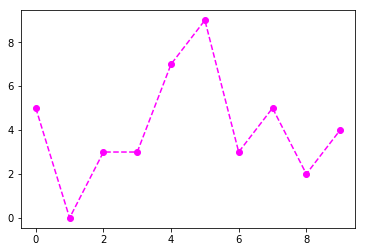

In [6]:
%matplotlib inline
plt.plot(x, y, marker='o', color='#FF00FF', linestyle='--')
plt.show()

## Projeções 2D
### Barras

* [matplotlib.pyplot.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

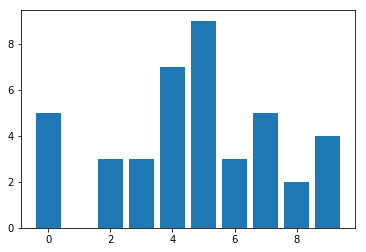

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.arange(10)
y = np.random.randint(low=0, high=10, size=10)

plt.bar(x, y)
plt.show()

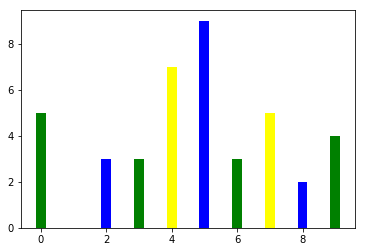

In [9]:
%matplotlib inline
b = np.random.randint(0, 3, size=10)
plt.bar(x=x, height=y, width=0.3, color=['green', 'yellow', 'blue'])
plt.show()

## Projeções 2D
### Histograma

* [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)
* Uma projeção importante para verificar como a distribuição de valores está se comportando
* Agrupa valores por intervalos
* No eixo x são mostrados os valores que a distribuição toma, e no eixo y o número de amostras que apresentaram aquele valor

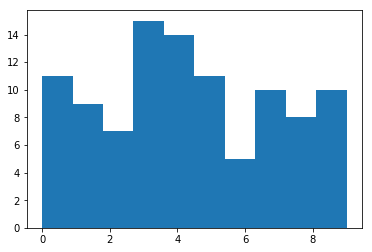

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
values = np.random.randint(low=0, high=10, size=100)

plt.hist(values, bins=10)
plt.show()

## Projeções 2D
### Boxplot

* [matplotlib.pyplot.boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
* Outra projeção para verificar a distribuição de valores
* Separa os valores por quartis, desenha um box contendo os 3 primeiros quartis, bem como os limites inferiores e superiores
* Também pode mostrar _outliers_


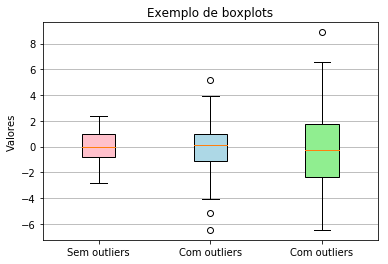

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# gera os dados
np.random.seed(123)
dados = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig = plt.figure()
ax = fig.add_subplot(111)

bplot = ax.boxplot(
    dados,
    vert=True,   # alinhamento vertical dos boxplots
    patch_artist=True  # preenche os boxplots com cores
)   

# pinta boxplots
for patch, color in zip(bplot['boxes'], ['pink', 'lightblue', 'lightgreen']):
    patch.set_facecolor(color)

# customiza eixos
ax.yaxis.grid(True)
ax.set_xticks(np.arange(3) + 1)
ax.set_xticklabels(['Sem outliers', 'Com outliers', 'Com outliers'])
ax.set_title('Exemplo de boxplots')
ax.set_ylabel('Valores')

plt.show()

## Projeções 2D
### Mapa de calor

* [matplotlib.pyplot.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

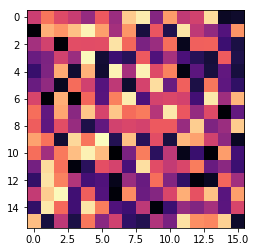

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
a = np.random.random((16, 16))
plt.imshow(a, cmap='magma', interpolation='nearest')
plt.show()

## Projeções 2D
### Imagens

* A mesma função utilizada para fazer heatmaps é utilizada para mostrar imagens ([imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html))
* Todavia, precisamos carregar a imagem para uma matriz multidimensional

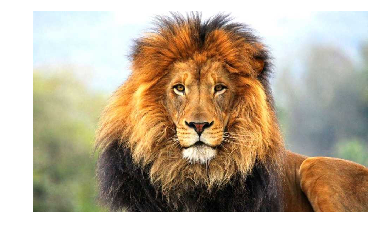

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('imagens/leao.png')
plt.imshow(img)
plt.axis('off')  # desativa eixos
plt.show()

## Leitura recomendada

* Biblioteca de exemplos da matplotlib: https://matplotlib.org/gallery.html

## Créditos

* Alguns slides foram adaptados do material dos Profs. [Felipe Meneguzzi](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4701128E9) e [Bernardo Copstein](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4785689T4)

# Matplotlib

## Prof. Henry Cagnini

### Agenda:

* Projeções 3D
  * Dispersão
  * Superfície
* Customização
  * Múltiplas projeções
  * Legenda
  * Anotações textuais
* Animações

## Projeções 3D
### Dispersão

* Existe uma variante tridimensional para a projeção de dispersão

<IPython.core.display.Javascript object>


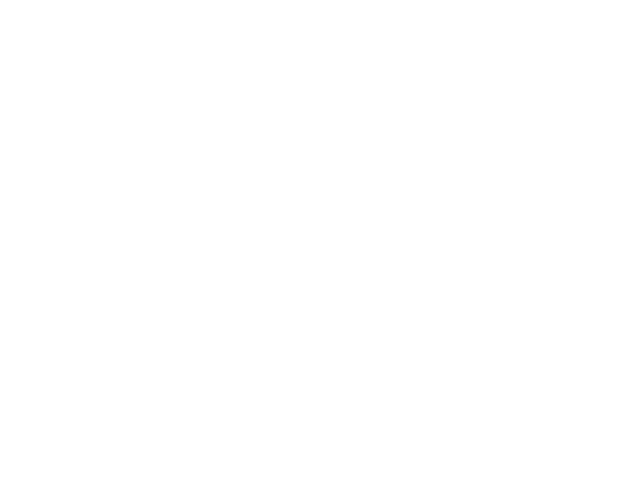

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sample = np.random.pareto(3, size=1000).reshape(10,10,10)

ax.scatter(sample[:,:,0], sample[:,:,1], sample[:,:,2], c='red', marker='o')

ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.set_zlabel('Eixo z')

plt.show()

## Projeções 3D
### Superfície

<IPython.core.display.Javascript object>


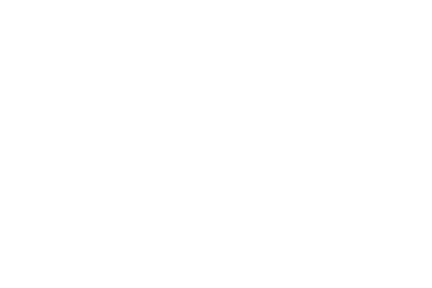

<IPython.core.display.Javascript object>


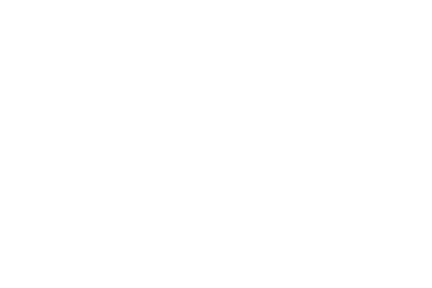

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

ax = plt.gca(projection='3d')

# gera os dados
_range = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(_range, _range)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

# projeta a superfície
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)

# customiza o eixo Z 
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

## Customização

* Matplotlib permite diversos tipos de customização
* Permite um controle virtualmente completo sobre as projeções que estão sendo feitas
* Nos próximos slides serão mostradas algumas das opções de customização mais populares

## Customização
### Múltiplas projeções

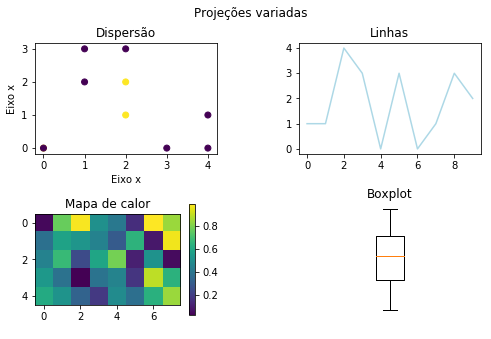

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,5))

# define projeções
axes[0][0].scatter(np.random.randint(0, 5, size=10), np.random.randint(0, 5, size=10), c=np.random.randint(0, 2, 10))  # linha 0, coluna 0
axes[0][1].plot(np.arange(10), np.random.randint(0, 5, size=10), c='lightblue')  # linha 0, coluna 1
heatmap = axes[1][0].imshow(np.random.random((5,8)), cmap='viridis', interpolation='nearest')
axes[1][1].boxplot(np.random.random(100))

# define títulos e nome dos eixos
axes[0][0].set_title('Dispersão')
axes[0][0].set_xlabel('Eixo x')
axes[0][0].set_ylabel('Eixo x')
axes[0][1].set_title('Linhas')
axes[1][0].set_title('Mapa de calor')
axes[1][1].set_title('Boxplot')
axes[1][1].axis('off')

plt.colorbar(heatmap, ax=axes[1][0])
plt.subplots_adjust(wspace=0.45, hspace=0.45)

plt.suptitle('Projeções variadas')

plt.show()

## Customização
### Anotações

* https://matplotlib.org/users/annotations_intro.html
* Permitem adicionar dicas textuais a uma projeção

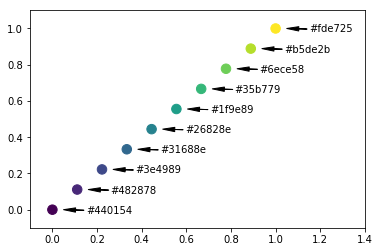

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import to_hex
from matplotlib import cm
import numpy as np

values = np.linspace(0, 1, 10)

hex_colors = list(map(to_hex, cm.viridis(values)))
plt.scatter(values, values, c=hex_colors, s=90)

for x, s in zip(values, hex_colors):
    plt.annotate(
        s, xy=(x + 0.05, x), xytext=(x + 0.15, x - 0.02),
        arrowprops=dict(facecolor='black', shrink=1.1, width=0.02, headwidth=4.3)
    )

plt.xlim(-0.1, 1.4)
plt.ylim(-0.1, 1.1)

plt.show()

## Customização
### Animações

* https://matplotlib.org/api/animation_api.html
* Recurso da matplotlib que permite animar projeções
* Permite exportar estas animações para gifs
* Altamente parametrizável

**IMPORTANTE:** para visualizar o exemplo a seguir, execute o script ```arquivos/animation.py``` a partir da linha de comando:

```
python animation.py
```

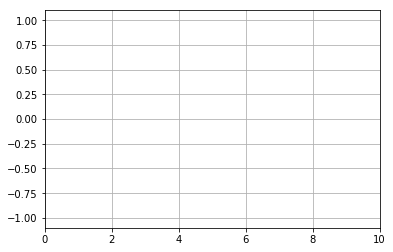

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []

def run(data):
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(
    fig, run, data_gen, blit=False, interval=10,
    repeat=False, init_func=init
)

plt.show()

## Leitura recomendada

* Biblioteca de projeções 3D: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* Biblioteca de exemplos da matplotlib: https://matplotlib.org/gallery.html

## Créditos

* Alguns slides foram adaptados do material dos Profs. [Felipe Meneguzzi](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4701128E9) e [Bernardo Copstein](http://buscatextual.cnpq.br/buscatextual/visualizacv.do?id=K4785689T4)

# NumPy

## Prof. Henry Cagnini

### Agenda:

* Introdução 
* Arrays
  * Construção
  * Operações
* Leitura recomendada

## Introdução

* NumPy é uma biblioteca para cálculo vetorial e matricial disponibilizada em Python
* Várias outras bibliotecas utilizam NumPy como base para seus cálculos
* Utilizar NumPy ao invés das estruturas básicas de Python (e.g. listas) apresenta melhorias de desempenho

## Arrays

* Funcionam como **arrays** em C++/Java
* Alocam espaços contíguos em memória
  * Listas em Python também alocam espaços contíguos, mas são menos eficientes que arrays numpy
* São utilizados em várias funções numpy

![array_vs_list](imagens/array_vs_list.png)

## Arrays

* Utilizar arrays permite cálculos ainda mais rápidos que funções em C de Python
* Abaixo realizamos três testes: usando list comprehension, map e lambda, e arrays com funções numpy
* Os testes são executados 100 vezes e a média é mostrada

In [13]:
import timeit
import numpy as np

In [14]:
setup = 'a = range(1000000)'
stmt = '[x**2 for x in a]'

times = timeit.repeat(setup=setup, stmt=stmt, number=1, repeat=100)
print('média de 100 execuções com list comprehension: %r segundos' % np.mean(times))

média de 100 execuções com list comprehension: 0.22318860262999124 segundos


In [15]:
setup = 'a = range(1000000); pow = lambda x: x**2'
stmt = 'map(pow, a)'

times = timeit.repeat(setup=setup, stmt=stmt, number=1, repeat=100)
print('média de tempos usando map: %r segundos' % np.mean(times))

média de tempos usando map: 2.516899940019357e-07 segundos


In [16]:
setup = 'import numpy as np;a = np.array(1000000)'
stmt = 'np.power(a, 2)'

times = timeit.repeat(setup=setup, stmt=stmt, number=1, repeat=100)
print('média de tempos usando numpy arrays: %r segundos' % np.mean(times))

média de tempos usando numpy arrays: 1.8236999949294842e-06 segundos


## Arrays

Por que numpy é tão rápido?
* Além de usar dados contíguos em memória, as funções numpy usam a biblioteca BLAS (Basic Linear Algebra Subprograms):
  * São subrotinas para realizar cálculos matemáticos e matriciais, disponíveis para CPUs e GPUs
  * MATLAB e Octave também utilizam BLAS 


## Arrays
### Construção de arrays

Existem diversas formas de iniciar um array em numpy:
* array
* arange
* zeros
* ones
* loadtxt

## Arrays
### Construção de arrays

* [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)
  * Constrói um array com base nos dados que são passados a estrutura
  * Dados podem ser provenientes de outros contêineres (e.g. lista, tupla)

In [17]:
import numpy as np

In [18]:
import numpy as np
tupla = ('a', 'b', 'c')
lista = [1, 2, 3]

a = np.array(lista)
b = np.array(tupla)

print(a)
print(b)

[1 2 3]
['a' 'b' 'c']


In [19]:
a = np.array([1, 2, 3], dtype=np.int)  # inicia um array de inteiros
b = np.array([1, 2, 3], dtype=np.float)  # inicia um array de ponto flutuante

print(a)
print(b)

[1 2 3]
[1. 2. 3.]


## Arrays
### Construção de arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
  * Mesmo funcionamento da função range
  * Várias assinaturas da função

In [20]:
import numpy as np

In [21]:
a = np.arange(10)  # limite superior (excluso)
b = np.arange(2, 5)  # limite inferior (incluso) e superior (excluso)
c = np.arange(0, 10, 2)  # limite inferior (incluso), superior (excluso), passo 
d = np.arange(5, dtype=np.float32)

print(a)
print(b)
print(c)
print(d)

[0 1 2 3 4 5 6 7 8 9]
[2 3 4]
[0 2 4 6 8]
[0. 1. 2. 3. 4.]


## Arrays
### Construção de arrays

* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) e [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)
  * constrói arrays onde todos os valores são zeros ou uns

In [22]:
import numpy as np

In [23]:
a = np.zeros(10)
b = np.ones(7)

print(a)
print(b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1.]


In [24]:
c = np.zeros((10, 10))
d = np.ones((5, 5), dtype=np.int)

print(c)
print(d)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


## Arrays
### Construção de arrays

* [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
  * carrega um arquivo para um array N-dimensional 

In [25]:
import numpy as np

In [26]:
a = np.loadtxt('arquivos/simple_array.csv', delimiter=',')
b = np.loadtxt('arquivos/simple_array.txt', delimiter=',')

print(a)
print(b)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


## Arrays
### Construção de arrays

* Cada uma das funções vistas anteriormente possui diversos parâmetros que permitem um melhor controle das suas funções
* Vale a pena olhar a documentação de cada uma delas

## Arrays

### Slicing

* Assim como em listas de Python, numpy arrays também podem ser fatiados (_slicing_)
  * Slicing é a técnica de “fatiar” um contêiner que suporta indexação linear 
  * O fatiamento se dá adicionando um par de colchetes ao fim da variável
  * Possui 3 parâmetros: **início** (incluso), **fim** (excluso) e **passo**


![slicing](imagens/slicing.png)

In [27]:
nums = np.arange(5)
print('array completo:\t\t\t', nums)        
print('do início ao fim:\t\t', nums[:])
print('do 2o (incluso) até o fim:\t', nums[2:])
print('do início ao 2o (excluso):\t', nums[:2])
print('do 2o (incluso) ao 4o (excluso):', nums[2:4])
print('do início ao último (excluso)\t', nums[:-1])
nums[2:4] = [8, 9]  # atribuição
print('após atribuição:\t\t', nums)

array completo:			 [0 1 2 3 4]
do início ao fim:		 [0 1 2 3 4]
do 2o (incluso) até o fim:	 [2 3 4]
do início ao 2o (excluso):	 [0 1]
do 2o (incluso) ao 4o (excluso): [2 3]
do início ao último (excluso)	 [0 1 2 3]
após atribuição:		 [0 1 8 9 4]


## Arrays
### Operações com arrays

Algumas operações com arrays incluem:
* divisão, multiplicação, soma, subtração
* junção
* transposição
* atribuição
* operações binárias e lógicas
* vetorização

## Arrays
### Operações com arrays

Algumas operações com arrays incluem:
* divisão, multiplicação, soma, subtração

In [28]:
import numpy as np

In [29]:
a = np.arange(0, 5)
b = np.arange(6, 11)

In [30]:
print(np.multiply(a, b))  
print(np.multiply(a, 5))  

[ 0  7 16 27 40]
[ 0  5 10 15 20]


In [31]:
print(np.divide(a, b))  
print(np.divide(a, 5))  

[0.         0.14285714 0.25       0.33333333 0.4       ]
[0.  0.2 0.4 0.6 0.8]


In [32]:
print(np.subtract(a, b))  
print(np.subtract(a, 5))  

[-6 -6 -6 -6 -6]
[-5 -4 -3 -2 -1]


In [33]:
print(np.add(a, b))
print(np.add(a, 5))

[ 6  8 10 12 14]
[5 6 7 8 9]


## Arrays
### Operações com arrays

* Transposição


In [34]:
import numpy as np

In [35]:
# transposição
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])

In [36]:
print(a.T)

[[0 3 6]
 [1 4 7]
 [2 5 8]]


In [37]:
print(np.transpose(a))

[[0 3 6]
 [1 4 7]
 [2 5 8]]


## Arrays
### Operações com arrays

* Transformação 


In [38]:
import numpy as np

In [39]:
a = np.arange(9)
print(a)

[0 1 2 3 4 5 6 7 8]


In [40]:
a = a.reshape(3,3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [41]:
print(a.ravel())

[0 1 2 3 4 5 6 7 8]


In [42]:
print(a.flatten())

[0 1 2 3 4 5 6 7 8]


## Arrays
### Operações com arrays

* Operações binárias

In [43]:
import numpy as np

In [44]:
a = np.array([0, 0, 1, 1], dtype=np.bool)
b = np.array([0, 1, 0, 1], dtype=np.bool)

In [45]:
print(a & b)

[False False False  True]


In [46]:
print(np.logical_and(a, b))

[False False False  True]


In [47]:
print(a | b)

[False  True  True  True]


In [48]:
print(np.logical_or(a, b))

[False  True  True  True]


In [49]:
print(np.logical_not(a))

[ True  True False False]


In [50]:
print(np.logical_xor(a, b))

[False  True  True False]


## Arrays
### Operações com arrays

* Vectorize
* Permite vetorizar funções
* Comportamento parecido com a função map nativa de Python

![](imagens/vectorize.png)

In [51]:
import numpy as np

Definição da função

In [52]:
def soma(a):
    return a + 1

Vetorização

In [53]:
vec_func = np.vectorize(soma)

Utilização

In [54]:
vec_func([0, 1, 2])

array([1, 2, 3])

## Leitura recomendada

* Documentação do NumPy: https://docs.scipy.org/doc/numpy/reference/index.html

# NumPy

## Prof. Henry Cagnini

### Agenda:

* Álgebra linear
* Matrizes
  * Operações com matrizes
* Ordenação
* Busca por valores
* Leitura recomendada

## Álgebra linear

* NumPy é uma das bibliotecas preferidas para cálculo matricial
* Apesar de existir um tipo [matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html), na prática ele não é muito utilizado

In [55]:
import numpy as np

In [56]:
a = np.arange(9).reshape(3,3)
b = np.arange(10, 19).reshape(3,3)

print(a)
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]


## Álgebra linear

### Multiplicação de matrizes

In [57]:
np.dot(a,b)

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

In [58]:
a@b

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

## Álgebra linear

### Diagonal principal

In [59]:
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [60]:
np.diagonal(a)

array([0, 4, 8])

## Álgebra linear

### Determinante 

In [61]:
np.linalg.det(a)

0.0

## Álgebra linear

### Inverso da matriz

Matrizes com determinante zero não possuem inverso

In [62]:
c = np.array([
    [7, 5],
    [3, 4]
])

In [63]:
np.linalg.det(c)

13.0

In [64]:
np.linalg.inv(c)

array([[ 0.30769231, -0.38461538],
       [-0.23076923,  0.53846154]])

## Ordenação

Existem diversos algoritmos para ordenação na biblioteca NumPy:

* Quicksort
* Mergesort
* Heapsort

Cada um desses algoritmos possui características que os tornam mais atrativos, dependendo do caso

| Algoritmo | Estável? | Inplace? |     Pior tempo de execução |
|:---------:|:--------:|:--------:|:--------------------------:|
| Quicksort |    não   |    sim   |                   $O(N^2)$ |
| Mergesort |    sim   |    não   |             $O(N \log(N))$ |
| Heapsort  |    não   |    sim   |             $O(N \log(N))$ |

In [65]:
np.random.seed(0)
w = np.random.choice(10, size=10, replace=False)

In [66]:
print(w)

[2 8 4 9 1 6 7 3 0 5]


In [67]:
np.sort(w)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
np.sort(w, kind='mergesort')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
np.random.seed(0)
z = np.random.choice(10, size=(2,5), replace=False)

In [70]:
print(z)

[[2 8 4 9 1]
 [6 7 3 0 5]]


Ordena baseado em cada coluna

In [71]:
np.sort(z, axis=0)

array([[2, 7, 3, 0, 1],
       [6, 8, 4, 9, 5]])

Ordena baseado em cada linha

In [72]:
np.sort(z, axis=1)

array([[1, 2, 4, 8, 9],
       [0, 3, 5, 6, 7]])

## Busca por valores

### Busca por valores máximos e mínimos
* [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
* [argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html)
* [max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html)
* [min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html)

In [73]:
np.random.seed(0)
a = np.random.choice(10, replace=False, size=10)

In [74]:
print(a)

[2 8 4 9 1 6 7 3 0 5]


In [75]:
np.max(a)

9

In [76]:
np.min(a)

0

Para recupear o **índice** do menor valor do array

In [77]:
print(a)

[2 8 4 9 1 6 7 3 0 5]


In [78]:
np.argmin(a)

8

In [79]:
a[np.argmin(a)]

0

Para recupear o **índice** do maior valor do array

In [80]:
print(a)

[2 8 4 9 1 6 7 3 0 5]


In [81]:
np.argmax(a)

3

In [82]:
a[np.argmax(a)]

9

## Busca por valores

### Recuperando e contando valores específicos

* [where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)
* [flatnonzero](https://docs.scipy.org/doc/numpy/reference/generated/numpy.flatnonzero.html)
* [count_nonzero](https://docs.scipy.org/doc/numpy/reference/generated/numpy.count_nonzero.html)

A função ```where``` retorna os índices multidimensionais nos quais um valor se encontra
* Útil para utilização com estruturas multidimensionais
* Pouco legível caso a estrutura seja um array unidimensional

In [83]:
a = np.array([
    ['a', 'b', 'c'],
    ['d', 'e', 'e'],
    ['f', 'f', 'g']
])

In [84]:
index = np.where(a == 'e')  # todos os índices onde a matriz possui valor 'e'
print(index)

(array([1, 1]), array([1, 2]))


In [85]:
print(a[index])

['e' 'e']


```flatnonzero``` retorna uma lista plana com os índices que satisfazem uma comparação
* Funciona melhor com arrays unidimensionais
* Também é possível utilizar com matrizes, mas é necessário planificá-las antes

In [86]:
index = np.flatnonzero(a == 'e')
print(index)

[4 5]


In [87]:
ravel = a.ravel()
print(ravel)

['a' 'b' 'c' 'd' 'e' 'e' 'f' 'f' 'g']


In [88]:
print(ravel[index])

['e' 'e']


```count_nonzero``` conta o número de ocorrências que satisfazem uma comparação
* independe do número de dimensões do array

In [89]:
np.count_nonzero(a == 'e')

2

## Leitura recomendada

* Documentação do NumPy: https://docs.scipy.org/doc/numpy/reference/index.html

# NumPy

## Prof. Henry Cagnini

### Agenda:

* Números randômicos
  * Amostragem
  * Distribuições probabilísticas
* Medidas de estatística
* Leitura recomendada

## Números randômicos

NumPy oferece uma biblioteca, ```numpy.random```, para geração de números randômicos
* [random](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.random)
* [randint](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint)
* [choice](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html#numpy.random.choice)

```random``` amostra valores no invervalo \[0, 1) 
* aceita como parâmetro o número de dimensões do array

In [2]:
import numpy as np

In [3]:
np.random.random(3)

array([0.86072829, 0.93187314, 0.48568789])

In [4]:
np.random.random((2, 2))

array([[0.53968838, 0.03649814],
       [0.87394907, 0.49688364]])

```randint``` amostra valores inteiros 
* Aceita como parâmetros:
  * limite inferior
  * limite superior
  * dimensões do array

In [5]:
import numpy as np

Amostra apenas um valor, no intervalo \[0, 5)

In [6]:
np.random.randint(5)

1

Amostra apenas um valor, no intervalo \[6, 10)

In [7]:
np.random.randint(6, 10)

8

Amostra 3 valores no intervalo \[10, 15)

In [8]:
np.random.randint(low=6, high=10, size=3)

array([8, 9, 9])

Amostra uma matrix (2,2) com valores no intervalo \[10, 15)

In [9]:
np.random.randint(low=6, high=10, size=(2,2))

array([[9, 9],
       [7, 6]])

```choice``` amostra valores dada uma distribuição
* Aceita como parâmetros:
  * ```a``` - Distribuição de valores
  * ```size``` - Número de amostras
  * ```replace``` - Se a amostragem é com reposição
  * ```p``` - Distribuição de probabilidades

In [10]:
import numpy as np

In [11]:
a = ['a', 'b', 'c', 'd', 'e']
p = [0.2, 0.2, 0.4, 0.1, 0.1]

Amostra apenas um valor, com distribuição uniforme

In [12]:
np.random.choice(a)

'd'

Amostra 10 exemplos, com reposição

In [13]:
np.random.choice(a, size=10)

array(['c', 'c', 'd', 'a', 'c', 'd', 'e', 'b', 'd', 'c'], dtype='<U1')

Amostra 10 exemplos, sem reposição
* Deve retornar um erro, já que existem mais amostras do que valores

In [14]:
try:
    np.random.choice(a, size=10, replace=False)
except Exception as e:
    print(e.args)

("Cannot take a larger sample than population when 'replace=False'",)


Amostra 5 exemplos, sem reposição

In [15]:
np.random.choice(a, size=5, replace=False)

array(['e', 'c', 'a', 'b', 'd'], dtype='<U1')

Amostra 100 exemplos, com reposição, usando ```p``` como distribuição de probabilidades
* Vamos contar a ocorrência dos exemplos na amostra, para ver se obedecem a distribuição de probabilidades fornecida a função

In [16]:
from collections import Counter

In [17]:
sample = np.random.choice(a, size=100, p=p)

In [18]:
counted = Counter(sample)
for val, prob in zip(a, p):
    print('Valor: %s Esperado: %f Amostrado: %f' % (val, prob, counted[val]/100.))

Valor: a Esperado: 0.200000 Amostrado: 0.110000
Valor: b Esperado: 0.200000 Amostrado: 0.210000
Valor: c Esperado: 0.400000 Amostrado: 0.480000
Valor: d Esperado: 0.100000 Amostrado: 0.100000
Valor: e Esperado: 0.100000 Amostrado: 0.100000


As frequências dos valores amostrados tendem a ```p``` a medida que o tamanho da amostra for maior

## Estatísticas

Existem diversas funções para extrair estatísticas de distribuições:

* [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
* [median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)
* [histogram](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.histogram.html)
* [percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html)

In [19]:
import numpy as np
np.random.seed(0)

In [20]:
a = np.random.randint(0, 10, size=10)
a.sort()
print(a)

[0 2 3 3 3 4 5 5 7 9]


In [21]:
np.mean(a)

4.1

In [22]:
np.median(a)

3.5

```percentile``` extrai o $q$-ésimo percentil da distribuição de valores
* O valor deve ser entre \[0, 100\]
* O $50$-ésimo percentil é a mediana

In [23]:
a = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]
print(a)

[43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]


In [24]:
np.percentile(a, 90, interpolation='nearest')

98

In [25]:
np.percentile(a, 50, interpolation='nearest')

77

```histogram``` agrupa os valores e mostra a quantidade de ocorrências para cada um deles
* Um parâmetro importante é o número de ```bins``` (i.e. intervalos a serem considerados)

In [26]:
import numpy as np

In [27]:
a = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]
print(a)

[43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]


In [28]:
np.histogram(a, bins=10)

(array([1, 1, 1, 2, 5, 2, 3, 2, 3, 5]),
 array([43. , 48.6, 54.2, 59.8, 65.4, 71. , 76.6, 82.2, 87.8, 93.4, 99. ]))

## Leitura recomendada

* Documentação do NumPy: https://docs.scipy.org/doc/numpy/reference/index.html